# Домашнее задание по кластеризации

Набор данных содержит сведения о 9000 клиентов банка.

Колонки в датасете:
- CUSTID : Идентификация владельца кредитной карты (категория)
- BALANCE : Сумма остатка, оставшаяся на их счету для совершения покупок (
- BALANCEFREQUENCY : Как часто обновляется Баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = редко обновляется)
- PURCHASES : Сумма покупок со счета
- ONEOFFPURCHASES : Максимальная сумма покупки за один раз
- INSTALLMENTSPURCHASES : Сумма покупки в рассрочку
- CASHADVANCE : Денежные средства авансом предоставлены пользователем
- PURCHASESFREQUENCY : Как часто совершаются покупки, от 0 до 1 (1 = часто покупают, 0 = редко покупают)
- ONEOFFPURCHASESFREQUENCY : Как часто Покупки происходят за один раз (1 = часто покупаются, 0 = редко покупаются)
- PURCHASESINSTALLMENTSFREQUENCY : Как часто совершаются покупки в рассрочку (1 = часто, 0 = редко)
- CASHADVANCEFREQUENCY : Как часто выплачиваются наличные авансом
- CASHADVANCETRX : Количество транзакций, совершенных с помощью «Cash in Advanced»
- PURCHASESTRX : Количество совершенных транзакций покупки
- CREDITLIMIT : Лимит кредитной карты для пользователя
- PAYMENTS : Сумма платежа, сделанного пользователем
- MINIMUM_PAYMENTS : Минимальная сумма платежей, совершаемых пользователем
- PRCFULLPAYMENT : Процент от полной оплаты, уплаченный пользователем
- TENURE : Срок обслуживания кредитной карты для пользователя

## Задания

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/home_work_7-8_clustering/Credit%20Card%20Dataset.csv")

### Задание 1.

Провести исследование данных (в том числе с визуализацией, к исследованию должны быть даны выводы и комментарии, все графики и оси должны быть подписаны).

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Figure size 720x432 with 0 Axes>

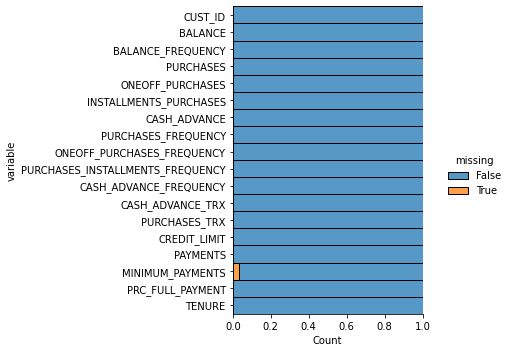

In [11]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Пропусков не так много. Если анализировать между собой поля без нулей, то нулабельные можно не трогать. Если нужно будет анализироавать что-то с нулами, то (чисто теоретически) такие объекты можно просто удалить (их не так много по сравнению со всеми данными) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

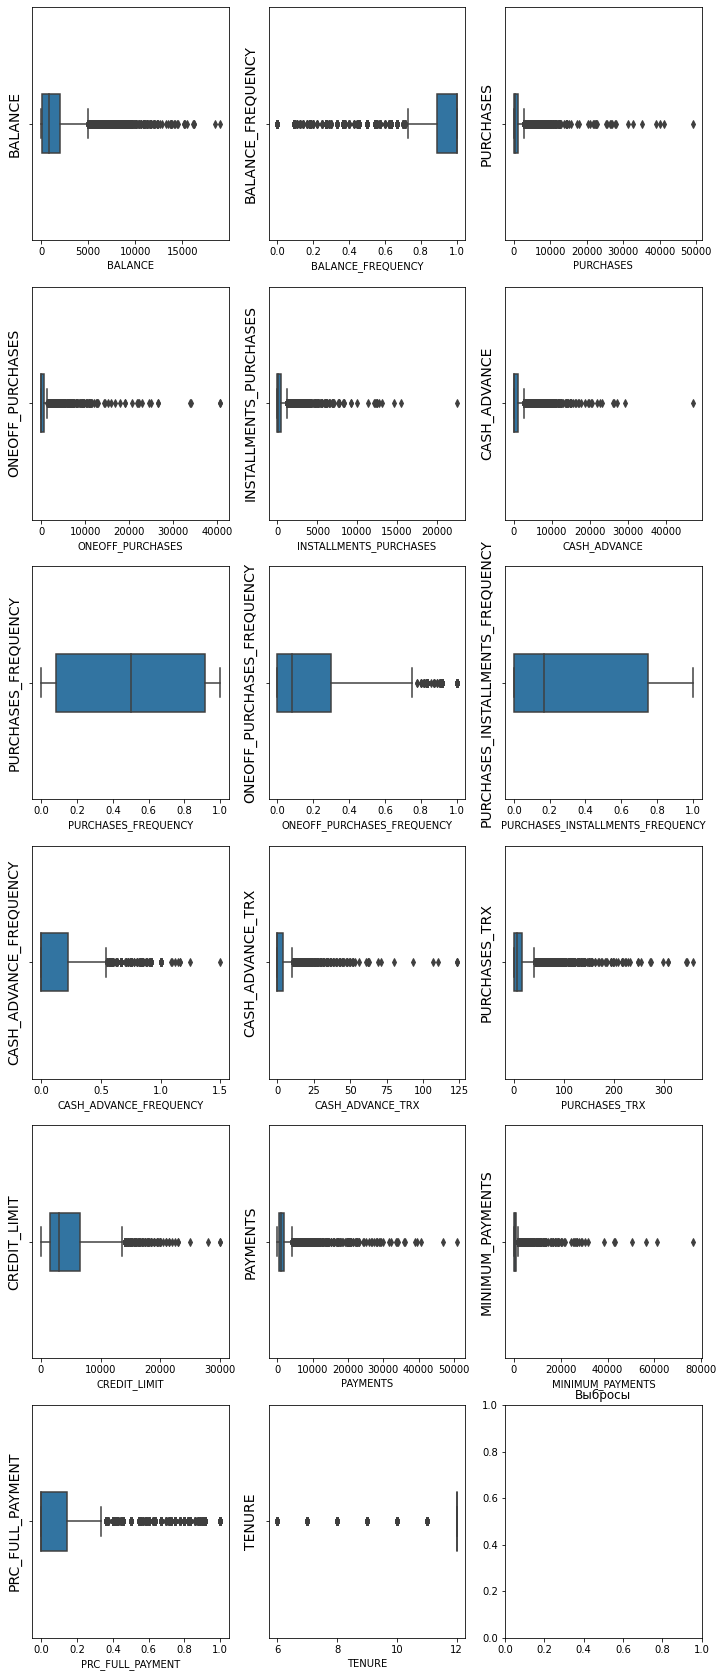

In [16]:
fig, axes = plt.subplots(6, 3, figsize=(12,30))
plt.title("Выбросы")
c = 0
for name in df.keys():
  if name == 'CUST_ID':
    continue
  ax = axes[c//3][c%3]
  ax.set_ylabel(name, fontsize=14)
  sns.boxplot(df[name], ax=ax, width=0.25)
  c += 1

Есть данные без выбросов. Но в большинстве случаев выбросы есть и их много. Нужно более подробно проанализировать (по смыслу) за что отвечает каждая переменная -> Может выбросы не критичны 

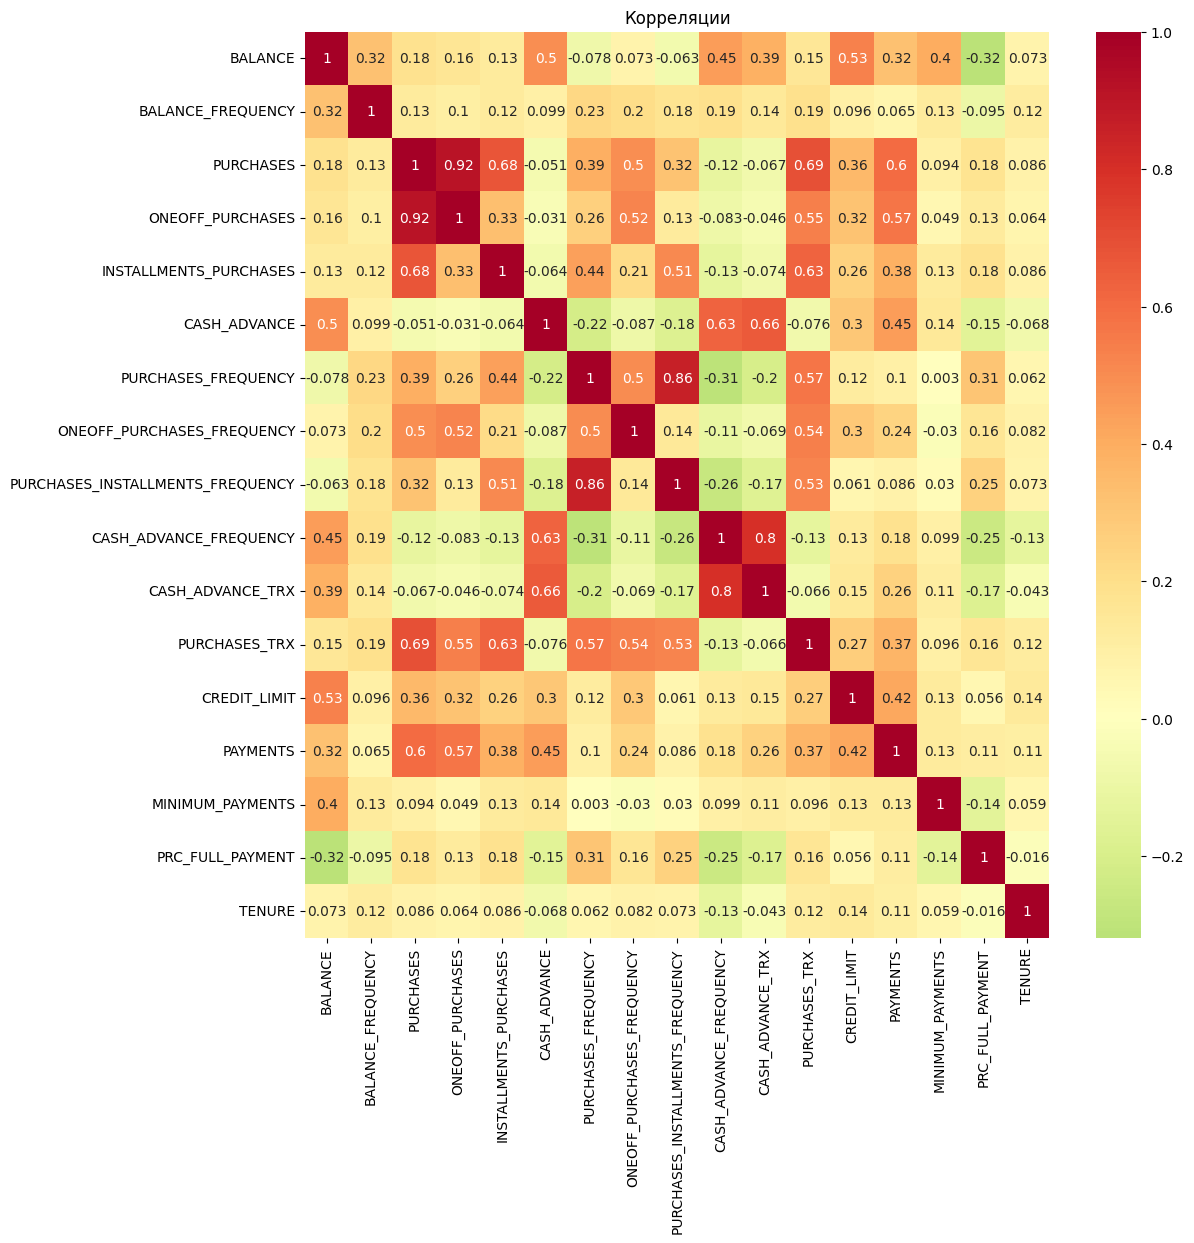

In [26]:
plt.figure(figsize=(12, 12), dpi=100)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn_r', center=0, annot=True, )
plt.title('Корреляции')
plt.show()

Есть сильно коррелирующие данные. Их нужно рассмотреть более подробно

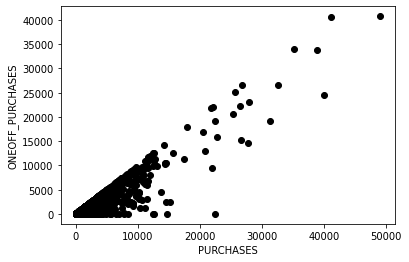

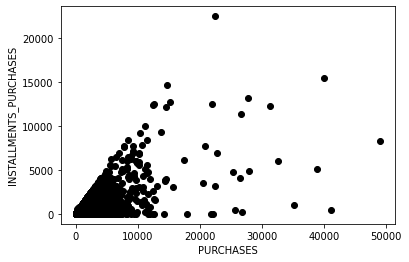

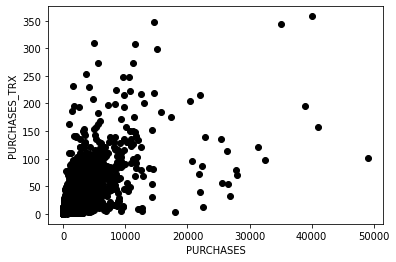

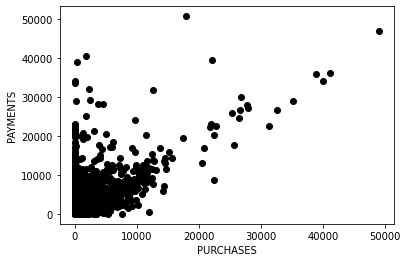

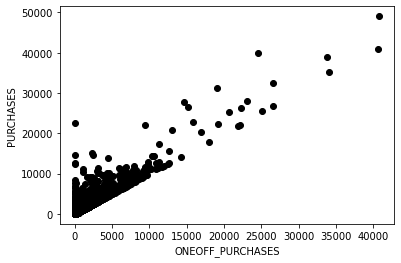

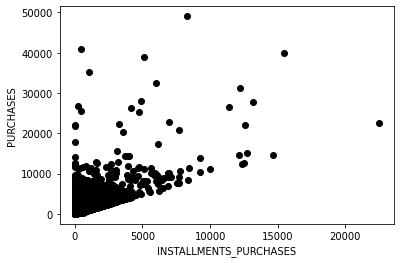

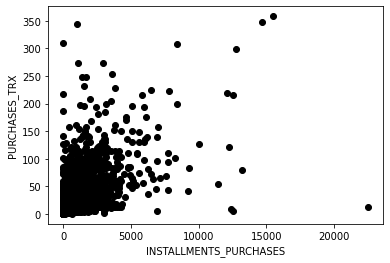

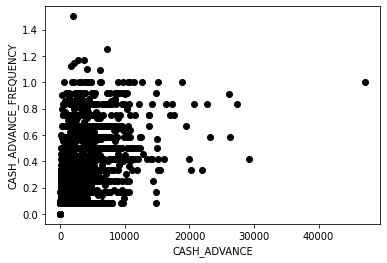

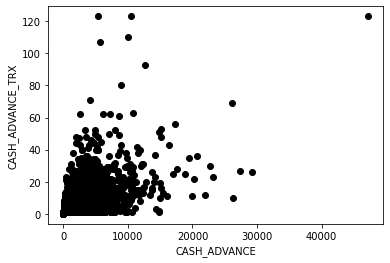

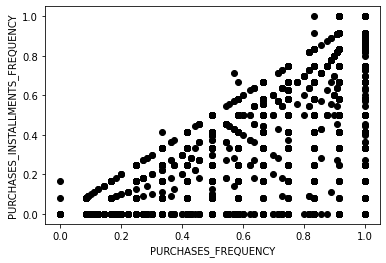

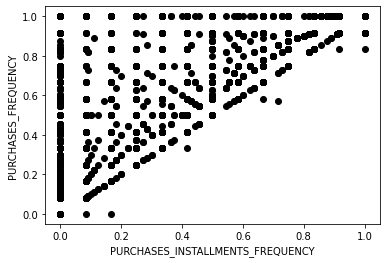

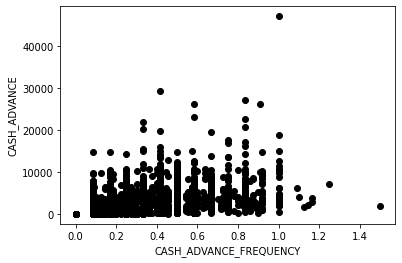

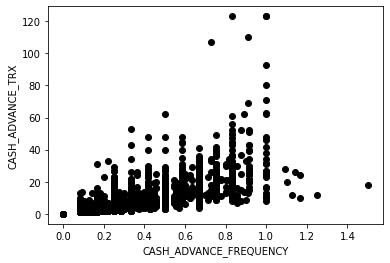

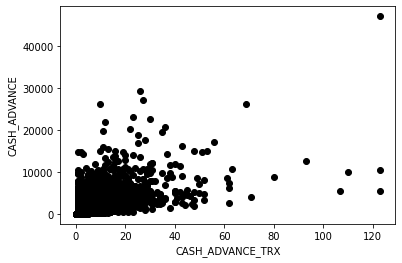

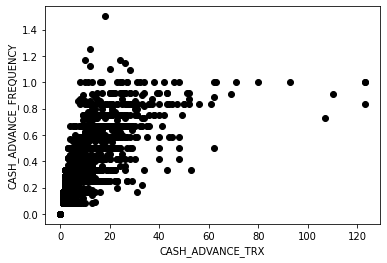

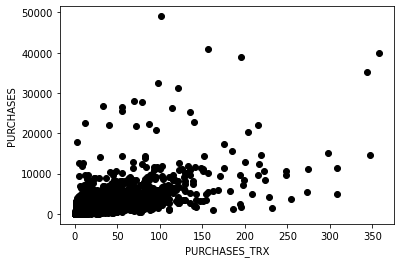

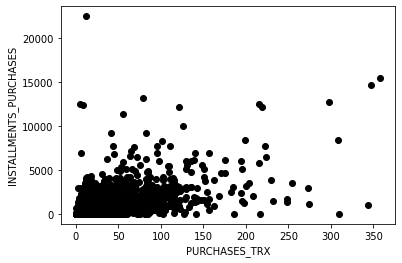

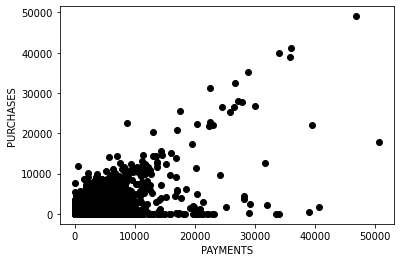

In [83]:
cor_df = df.corr()
pairs = []
for column1 in cor_df.columns:
  for column2 in cor_df.columns:
    if abs(cor_df[column1][column2]) >= 0.6 and column1 != column2:
      pairs.append([column1, column2])



for pair in pairs:
  fig, ax = plt.subplots()
  plt.xlabel(pair[0])        
  plt.ylabel(pair[1])
  ax.scatter(df[pair[0]], df[pair[1]], c = 'black')
  plt.show()






Точки не хоатично разбросанны. Наюлюдаются даже некоторые закономерности

<Figure size 2400x2400 with 0 Axes>

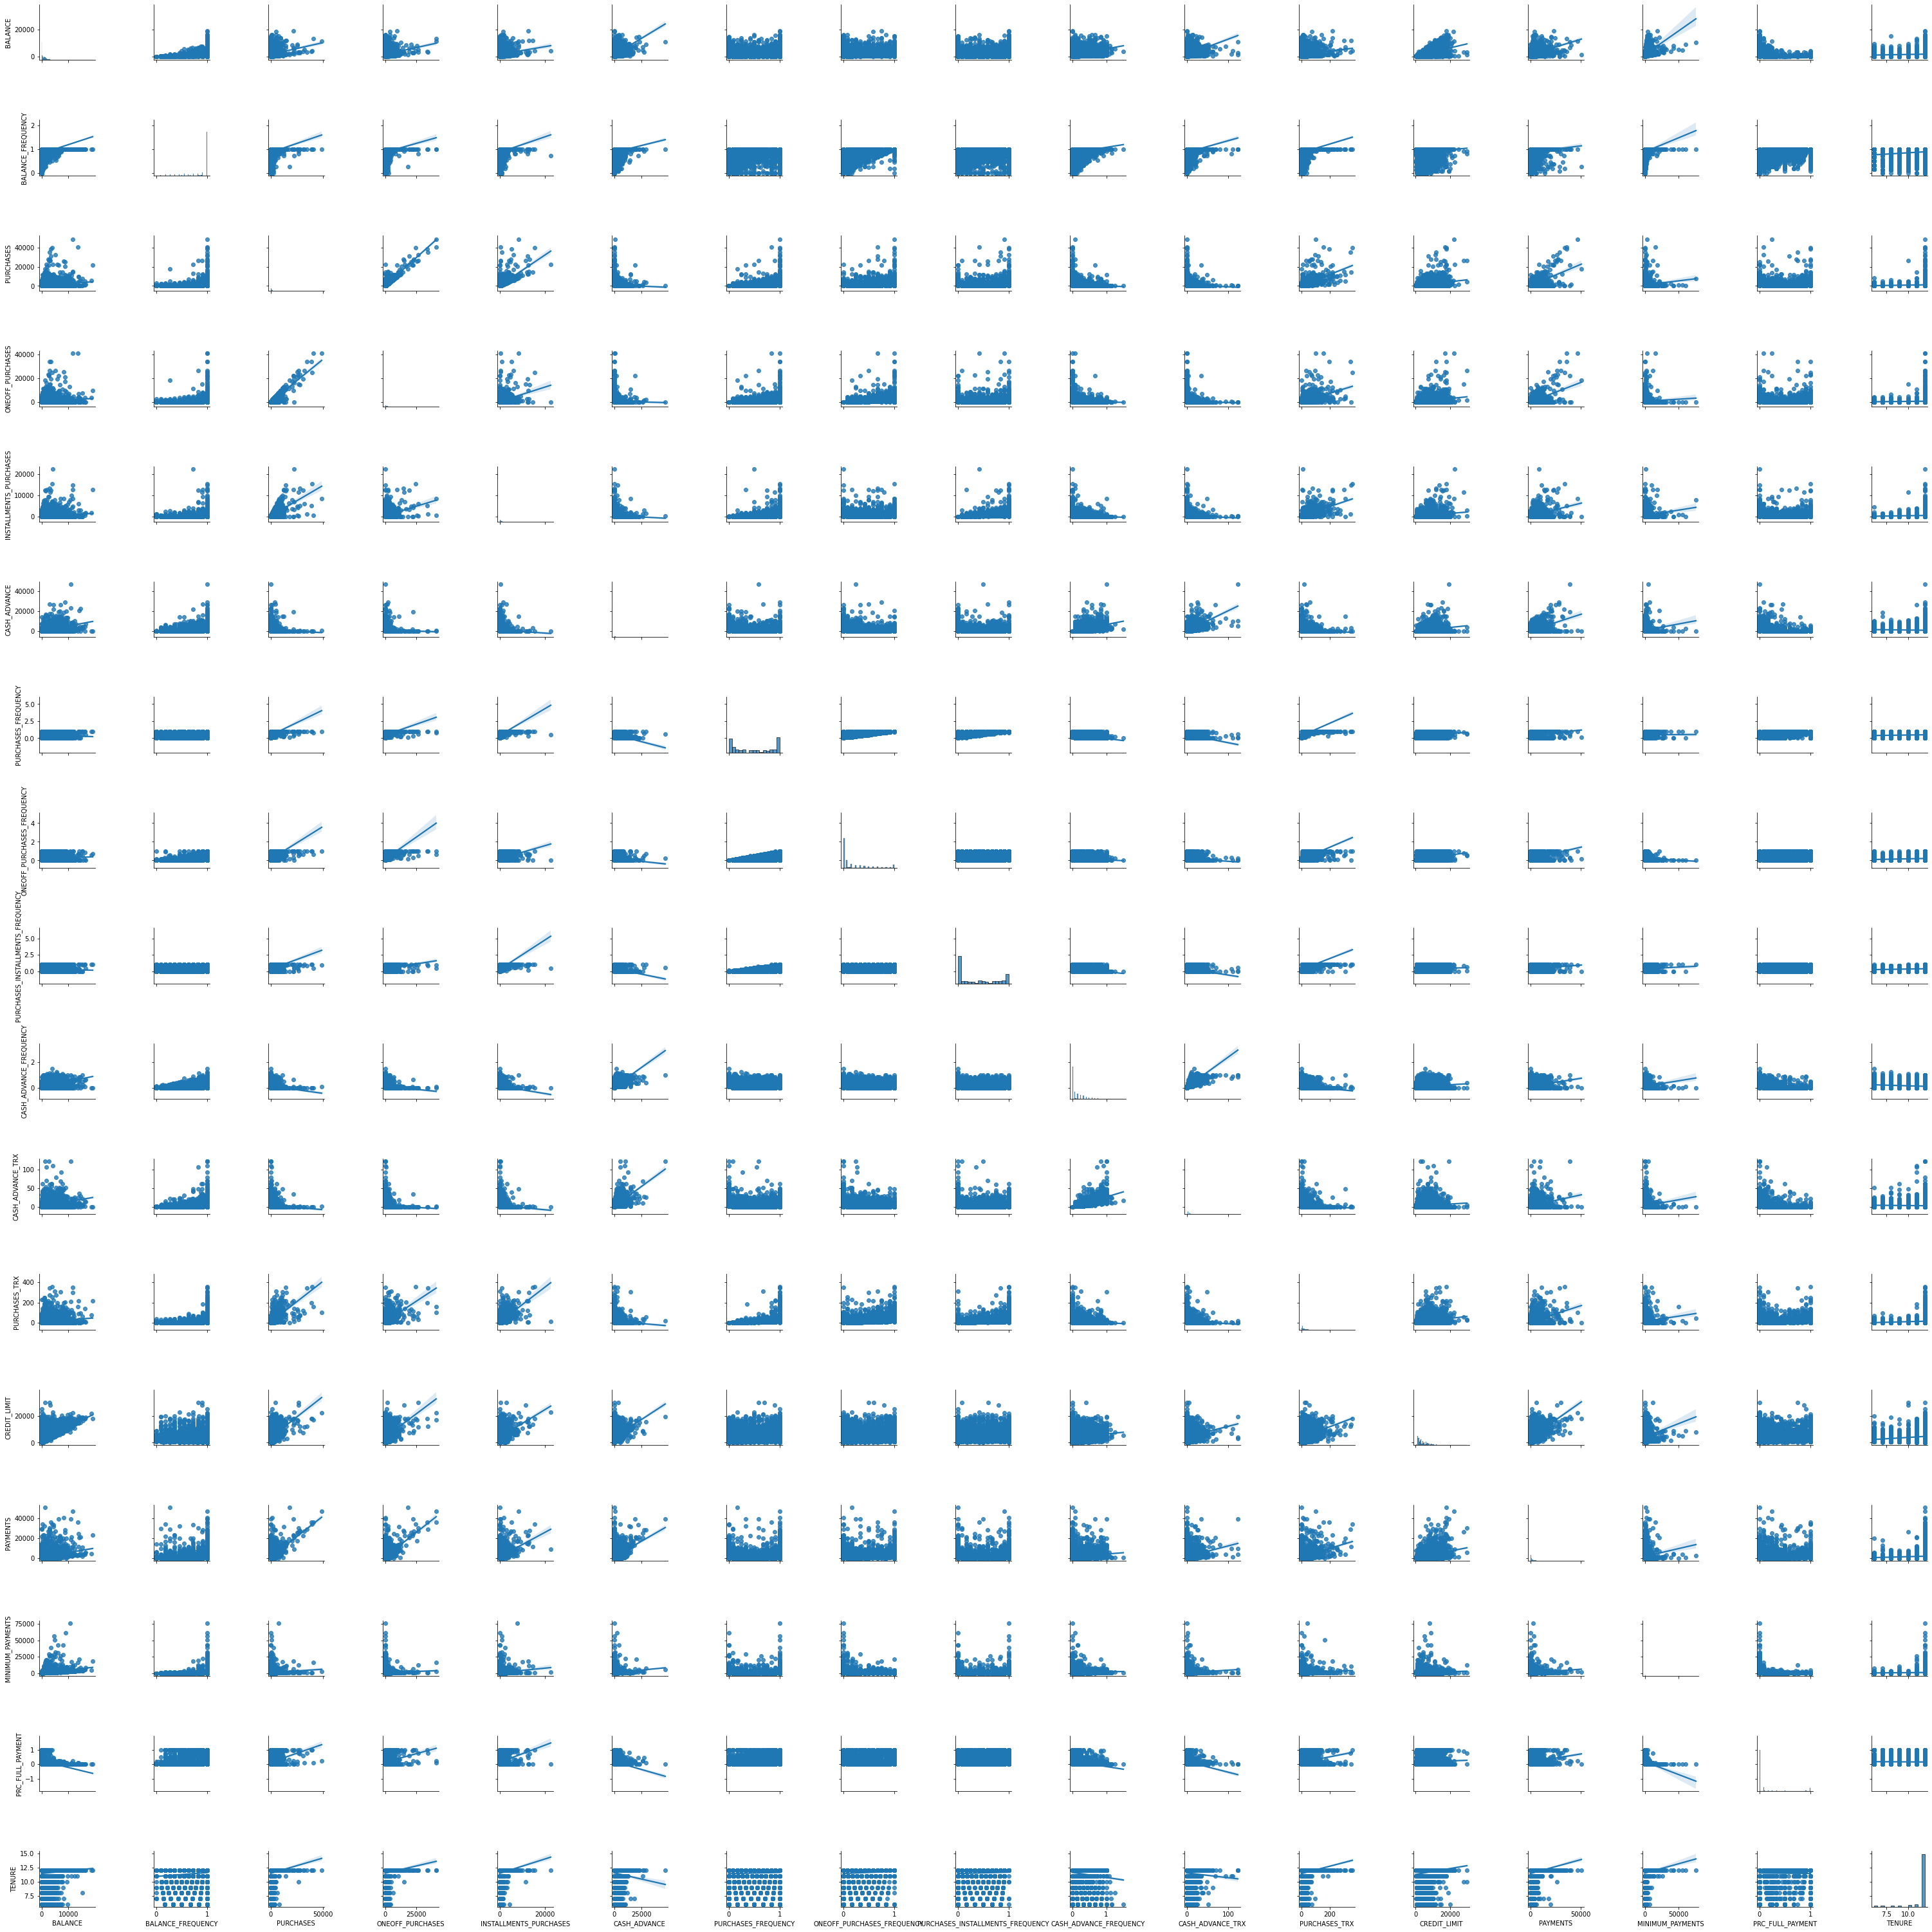

In [85]:
plt.figure(figsize=(30,30), dpi=80)
sns.pairplot(df, kind="reg")
plt.show()  

### Закономерности (визуальные) наблюдаются не только у сильно кореллирующих данных

### Задание 2

Реализовать метод кластарезации KMeans:
1. Методом локтя и силуется (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных. 

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

In [111]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib

In [94]:
df = df.drop('CUST_ID', axis = 1)
df = df.dropna(axis=0, how='any')

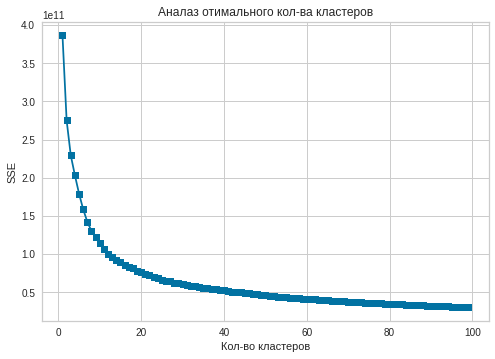

In [95]:
SSE = []
for k in range(1,100):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,100), SSE, marker='s')
plt.xlabel('Кол-во кластеров')
plt.ylabel('SSE')
plt.title('Аналаз отимального кол-ва кластеров')
plt.show()

Мне сложно сказать, где именно сгибается локоть. Но где-то +- около 20-25 SSE падает не сильно. (Где-то к +- 15 можно провести касательную под 45*). Думаю, нужно пытаться кластаризовывать данные используя не все значения сразу, а частями (2-5 переменных) (выбираем переменные и их кол-во в зависимости от поставленной задачи).  

In [129]:
kmeans = KMeans(n_clusters = 20)
kmeans.fit(df)
df['cluster'] = kmeans.predict(df)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,9
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


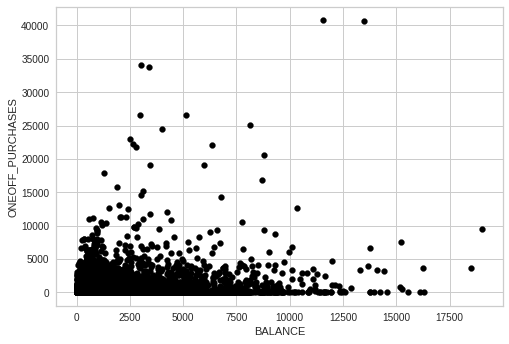

In [163]:
plt.scatter(df['BALANCE'], df['ONEOFF_PURCHASES'], 35, 'black')
plt.xlabel('BALANCE')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

In [137]:
colors = []
for pair in matplotlib.colors.CSS4_COLORS.items():
  colors.append(pair)

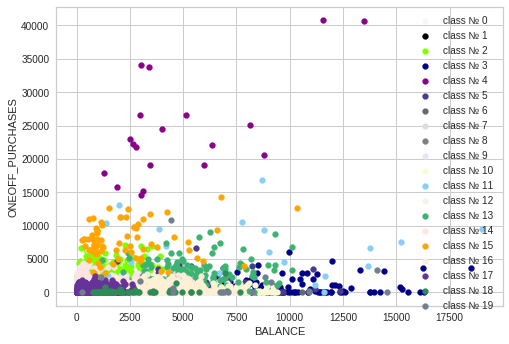

In [162]:
for i in range(20): 
  plt.scatter(df[df['cluster']==i]['BALANCE'], df[df['cluster']==i]['ONEOFF_PURCHASES'], 35, colors[i*7][1], label=f'class № {i}')
  plt.legend(loc=0)
plt.xlabel('BALANCE')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

Ну ...
Нужно выбирать переменные в зависимрсти от задачи

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd36d542a30>,
                     estimator=KMeans(n_clusters=20))

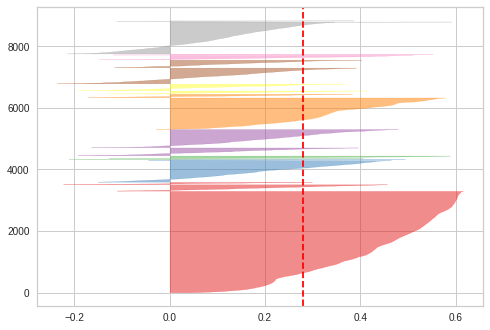

In [103]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df)

Меньше 0.3 . . .

In [105]:
def visual_n_clusters(n):
  kmeans = KMeans(n_clusters = n)
  kmeans.fit(df)
  visualizer = SilhouetteVisualizer(kmeans)
  visualizer.fit(df)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warning

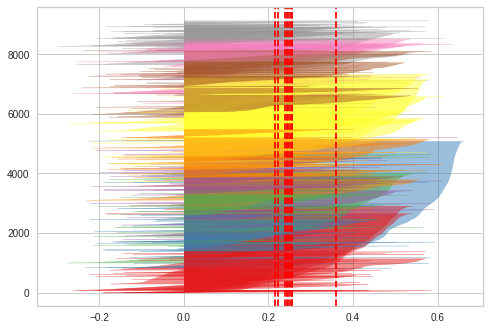

In [106]:
for n in [i for i in range(10, 51, 5)]:
  visual_n_clusters(n)

Лучший результат ~ 0.38

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warning

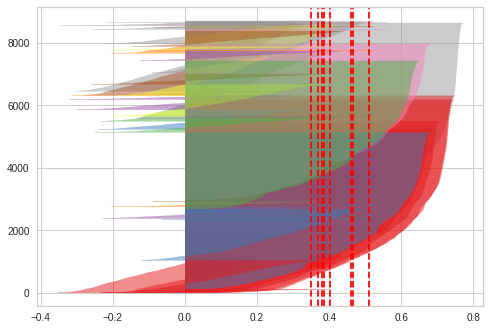

In [110]:
for n in [i for i in range(2, 10)]:
  visual_n_clusters(n)

Есть > 0.5. Но я не верю, что всех людей в банке можно разделить на <, чем 10 групп. 

 **Нужно кластаризовывать людей по каким-то конкретным переменным, а не по всем данным сразу**

### Задание 3

Реализовать иерархический метод кластарезации:
1. Должны быть построены дендрограммы и обоснован выбор количества кластеров.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

In [98]:
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt

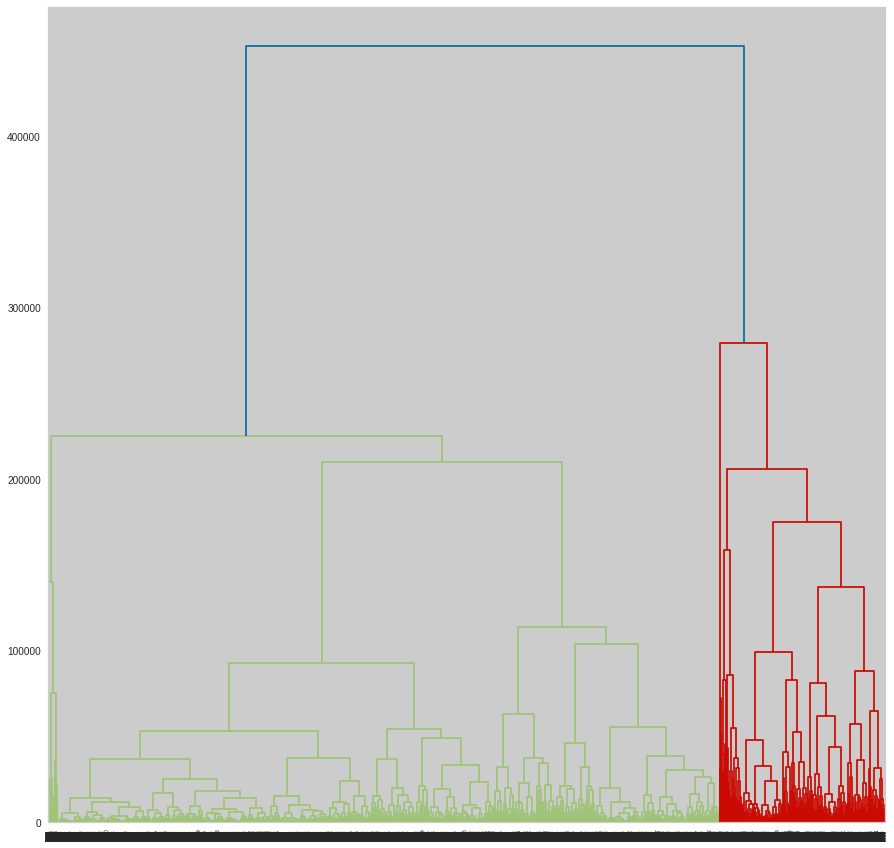

In [165]:
# for method in ['single', 'complete', 'average', 'centroid', 'ward']:
plt.figure(figsize=(15, 15))
Z = linkage(df, 'ward')
dendrogram(Z)

Я бы взял расстояние на уровне чуть ниже 100000. Так, как раз, получается что-то около 20 кластеров. Но здесь могу сделать лишь только тоже самое замечание, что и к предыдущему заданию (нужно кластаризовывать анализируя не всё сразу, а только некоторое кол-во переменных).

Можно построить дендрограмму, используя другие способы расчёта расстояния ( ['single', 'complete', 'average', 'centroid', 'ward'] ). Но 'ward' расчитывался 7 минут, а ждать все остальные . . .

In [ ]:
label = fcluster(Z, 20, criterion='distance')
df['cluster'] = np.unique(label)

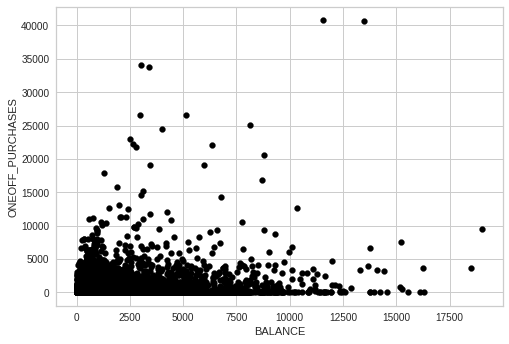

In [167]:
plt.scatter(df['BALANCE'], df['ONEOFF_PURCHASES'], 35, 'black')
plt.xlabel('BALANCE')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

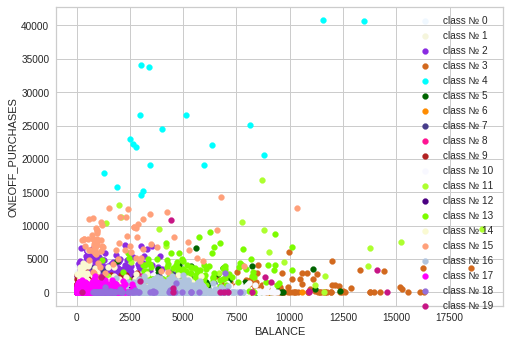

In [170]:
for i in range(20): 
  plt.scatter(df[df['cluster']==i]['BALANCE'], df[df['cluster']==i]['ONEOFF_PURCHASES'], 35, colors[i*5][1], label=f'class № {i}')
  plt.legend(loc=0)
plt.xlabel('BALANCE')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

Мы класторизовали на основе всех данных. В одном и том же месте намешаны точки разных кластеров